In [8]:
#Plots connectivities between L4->L23 and within L23
input_map_file = 'input_map1_4'
neuron_file = 'neuron_list1'
conn_folder = 'connections1'

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [3]:
#load neuron list
nrn_list = pd.read_csv('../build/' + neuron_file + '.csv', sep=' ')
idx_E = np.where(nrn_list.type=='LIF_exc')[0]
idx_I = np.where(nrn_list.type=='LIF_inh')[0]
num_nrn = len(idx_E)+len(idx_I)
nrn_list.head()

,index,type,x,y,z,tuning,morphology,cell_par
0,0,LIF_exc,51.382,-499.672,-35.104,None,None,None
1,1,LIF_exc,-372.013,795.513,-31.577,None,None,None
2,2,LIF_exc,954.005,33.572,8.531,None,None,None
3,3,LIF_exc,-883.153,980.875,44.432,None,None,None
4,4,LIF_exc,210.566,681.743,22.845,None,None,None


In [4]:
#load input mapping
inp_map = pd.read_csv('../build/' + input_map_file + '.csv', sep=' ')
num_inp = max(inp_map.src_gid)+1
inp_map.head()

,index,src_gid,src_vis_x,src_vis_y,presyn_type,N_syn
0,0,80,133.325,-605.261,LIF_inp,465
1,0,91,653.146,-366.447,LIF_inp,455
2,0,128,500.829,-432.442,LIF_inp,417
3,0,134,-346.969,-304.489,LIF_inp,114
4,0,292,68.816,-144.267,LIF_inp,415


In [5]:
conn_files = os.listdir('../build/' + conn_folder)
conn_files = np.array(conn_files)[np.array([conn_files[k].find('target')>=0 for k in range(len(conn_files))])]
conn_files

array(['target_0_100.dat', 'target_100_200.dat', 'target_200_300.dat',
       'target_300_400.dat', 'target_400_500.dat'], 
      dtype='|S18')

In [6]:
#load connection list (.dat files with 100 target ids each)
conn_list = []
for n in range(len(conn_files)):
    conn_list_tmp = pd.read_csv('../build/' + conn_folder + '/' + conn_files[n], sep=' ', header=None, names=['tgt', 'src', 'N_syn'])
    if len(conn_list)==0:
        conn_list = conn_list_tmp
    else:
         conn_list = conn_list.append(conn_list_tmp)   
conn_list.head()

,tgt,src,N_syn
0,0,6,14
1,0,56,36
2,0,75,25
3,0,80,48
4,0,90,43


<IPython.core.display.Javascript object>


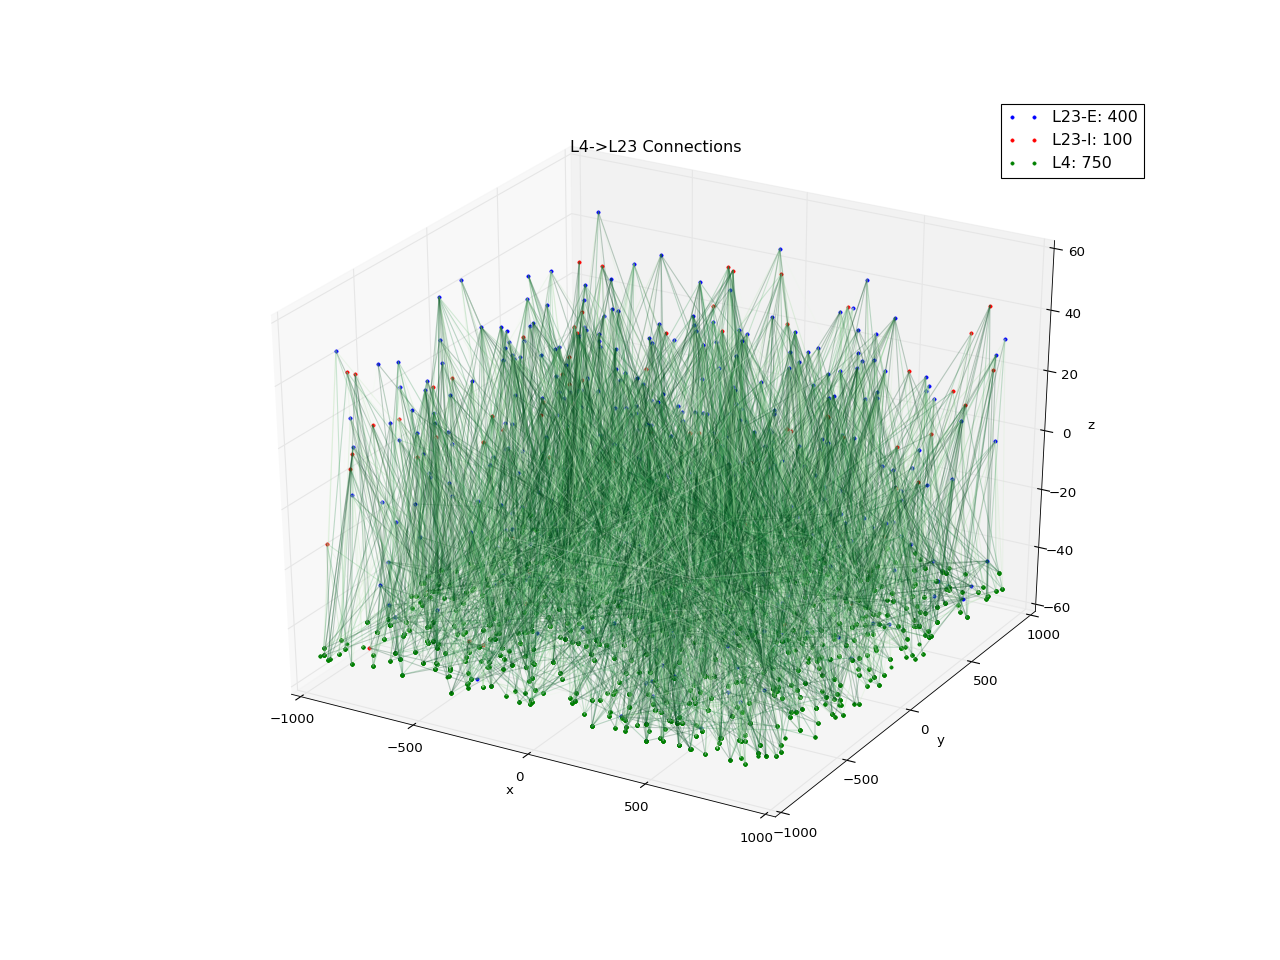

In [7]:
#plot L4->L23 connections
z_pos = -50 #FIXME: hard-coded values!!
w_min = min(inp_map.N_syn)
w_max = max(inp_map.N_syn)
c_map = plt.cm.Greens(range(w_max-w_min+1))
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(np.array(nrn_list.x)[np.array(nrn_list.type)=='LIF_exc'], np.array(nrn_list.y)[np.array(nrn_list.type)=='LIF_exc'], np.array(nrn_list.z)[np.array(nrn_list.type)=='LIF_exc'], '.b', alpha=1., label='L23-E: %d'%(np.sum(np.array(nrn_list.type)=='LIF_exc')))
ax.plot(np.array(nrn_list.x)[np.array(nrn_list.type)=='LIF_inh'], np.array(nrn_list.y)[np.array(nrn_list.type)=='LIF_inh'], np.array(nrn_list.z)[np.array(nrn_list.type)=='LIF_inh'], '.r', alpha=1., label='L23-I: %d'%(np.sum(np.array(nrn_list.type)=='LIF_inh')))
ax.plot(inp_map.src_vis_x, inp_map.src_vis_y, z_pos, '.g', label='L4: %d'%(num_inp))
for src in range(num_inp):
    tgt_sel = inp_map[inp_map.src_gid==src]['index'].values
    src_x = inp_map[inp_map.src_gid==src].src_vis_x.values
    src_y = inp_map[inp_map.src_gid==src].src_vis_y.values
    src_w = inp_map[inp_map.src_gid==src].N_syn.values
    for n, tgt in enumerate(tgt_sel):
        ax.plot([src_x[n], nrn_list[nrn_list.index==tgt].x.values[0]], [src_y[n], nrn_list[nrn_list.index==tgt].y.values[0]], [z_pos, nrn_list[nrn_list.index==tgt].z.values[0]], color=c_map[src_w[n]-w_min], alpha=0.25)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('L4->L23 Connections')
ax.legend()
fig.savefig('../build/' + input_map_file + '_Conn3D.png', dpi=600)

<IPython.core.display.Javascript object>


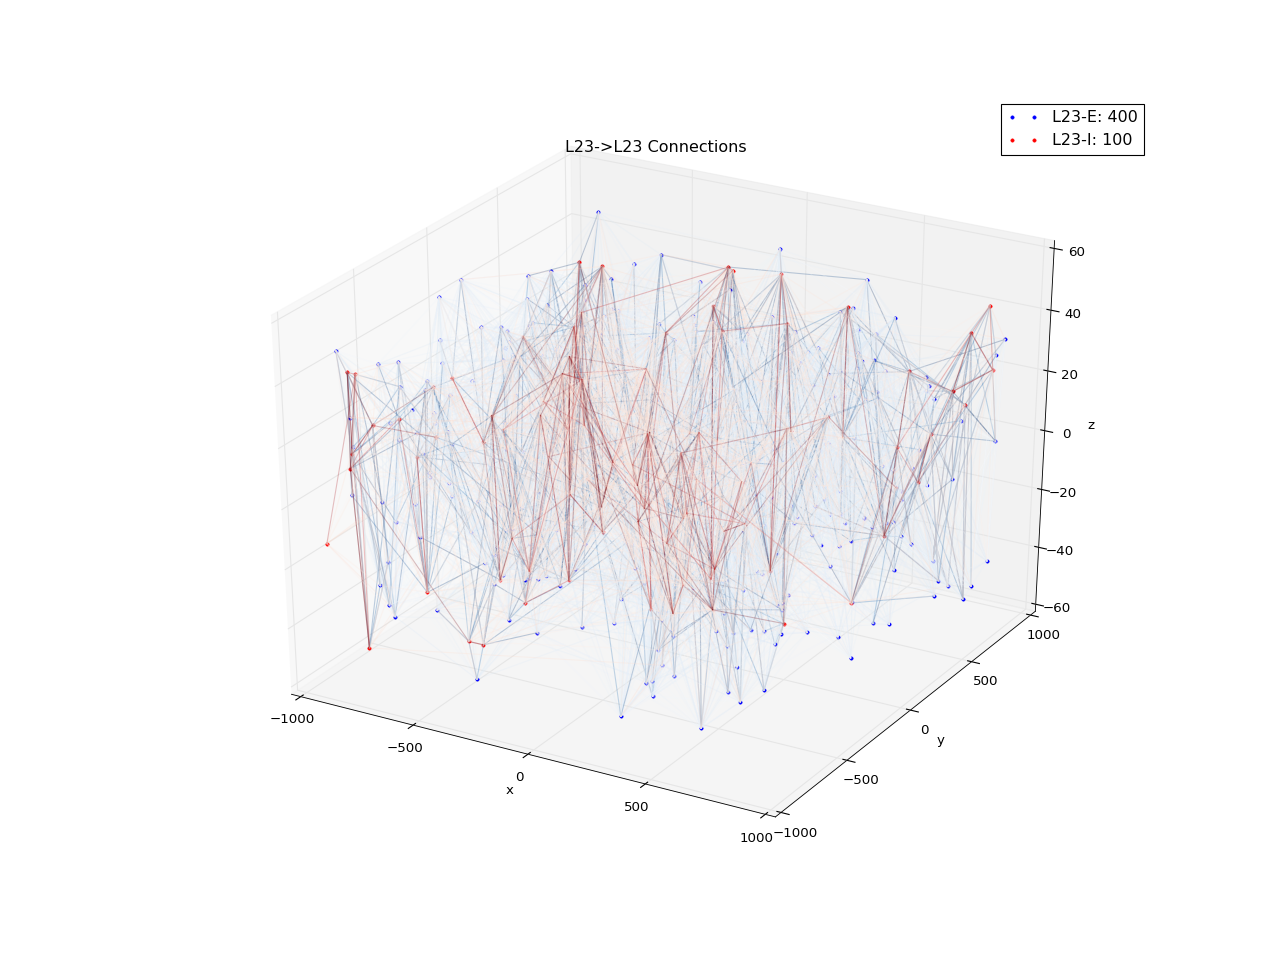

In [8]:
#plot L23->L23 E+I connections
w_min = min(conn_list.N_syn)
w_max = max(conn_list.N_syn)
c_map_b = plt.cm.Blues(range(w_max-w_min+1))
c_map_r = plt.cm.Reds(range(w_max-w_min+1))
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(np.array(nrn_list.x)[np.array(nrn_list.type)=='LIF_exc'], np.array(nrn_list.y)[np.array(nrn_list.type)=='LIF_exc'], np.array(nrn_list.z)[np.array(nrn_list.type)=='LIF_exc'], '.b', alpha=1., label='L23-E: %d'%(np.sum(np.array(nrn_list.type)=='LIF_exc')))
ax.plot(np.array(nrn_list.x)[np.array(nrn_list.type)=='LIF_inh'], np.array(nrn_list.y)[np.array(nrn_list.type)=='LIF_inh'], np.array(nrn_list.z)[np.array(nrn_list.type)=='LIF_inh'], '.r', alpha=1., label='L23-I: %d'%(np.sum(np.array(nrn_list.type)=='LIF_inh')))
for src in range(num_nrn):
    if src in idx_E:
        src_cm = c_map_b
    elif src in idx_I:
        src_cm = c_map_r
    else:
        assert False, 'ERROR: Unknown neuron type!'  
    tgt_sel = conn_list[conn_list.src==src]['tgt'].values
    src_w = conn_list[conn_list.src==src]['N_syn'].values
    src_x = nrn_list[nrn_list.index==src].x.values[0]
    src_y = nrn_list[nrn_list.index==src].y.values[0]
    src_z = nrn_list[nrn_list.index==src].z.values[0]  
    for n, tgt in enumerate(tgt_sel):
        ax.plot([src_x, nrn_list[nrn_list.index==tgt].x.values[0]], [src_y, nrn_list[nrn_list.index==tgt].y.values[0]], [src_z, nrn_list[nrn_list.index==tgt].z.values[0]], color=src_cm[src_w[n]-w_min], alpha=0.25)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('L23->L23 Connections')
ax.legend()
fig.savefig('../build/' + neuron_file + '_Conn3D.png', dpi=600)

<IPython.core.display.Javascript object>


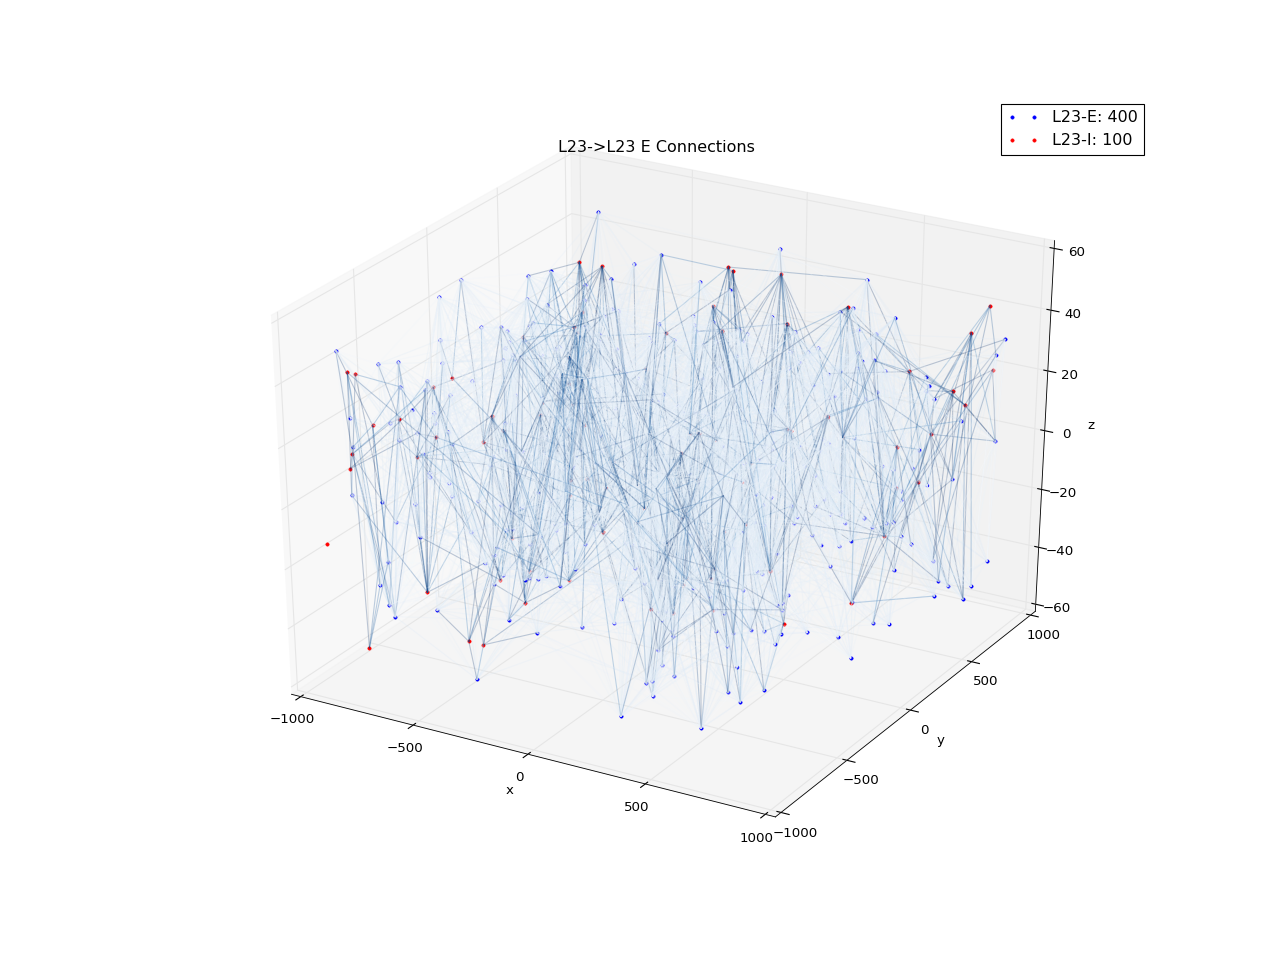

In [9]:
#plot L23->L23 E connections
w_min = min(conn_list.N_syn)
w_max = max(conn_list.N_syn)
c_map_b = plt.cm.Blues(range(w_max-w_min+1))
c_map_r = plt.cm.Reds(range(w_max-w_min+1))
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(np.array(nrn_list.x)[np.array(nrn_list.type)=='LIF_exc'], np.array(nrn_list.y)[np.array(nrn_list.type)=='LIF_exc'], np.array(nrn_list.z)[np.array(nrn_list.type)=='LIF_exc'], '.b', alpha=1., label='L23-E: %d'%(np.sum(np.array(nrn_list.type)=='LIF_exc')))
ax.plot(np.array(nrn_list.x)[np.array(nrn_list.type)=='LIF_inh'], np.array(nrn_list.y)[np.array(nrn_list.type)=='LIF_inh'], np.array(nrn_list.z)[np.array(nrn_list.type)=='LIF_inh'], '.r', alpha=1., label='L23-I: %d'%(np.sum(np.array(nrn_list.type)=='LIF_inh')))
for src in range(num_nrn):
    if src in idx_E:
        src_cm = c_map_b
    elif src in idx_I:
        continue
    else:
        assert False, 'ERROR: Unknown neuron type!'  
    tgt_sel = conn_list[conn_list.src==src]['tgt'].values
    src_w = conn_list[conn_list.src==src]['N_syn'].values
    src_x = nrn_list[nrn_list.index==src].x.values[0]
    src_y = nrn_list[nrn_list.index==src].y.values[0]
    src_z = nrn_list[nrn_list.index==src].z.values[0]  
    for n, tgt in enumerate(tgt_sel):
        ax.plot([src_x, nrn_list[nrn_list.index==tgt].x.values[0]], [src_y, nrn_list[nrn_list.index==tgt].y.values[0]], [src_z, nrn_list[nrn_list.index==tgt].z.values[0]], color=src_cm[src_w[n]-w_min], alpha=0.25)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('L23->L23 E Connections')
ax.legend()
fig.savefig('../build/' + neuron_file + '_EConn3D.png', dpi=600)

<IPython.core.display.Javascript object>


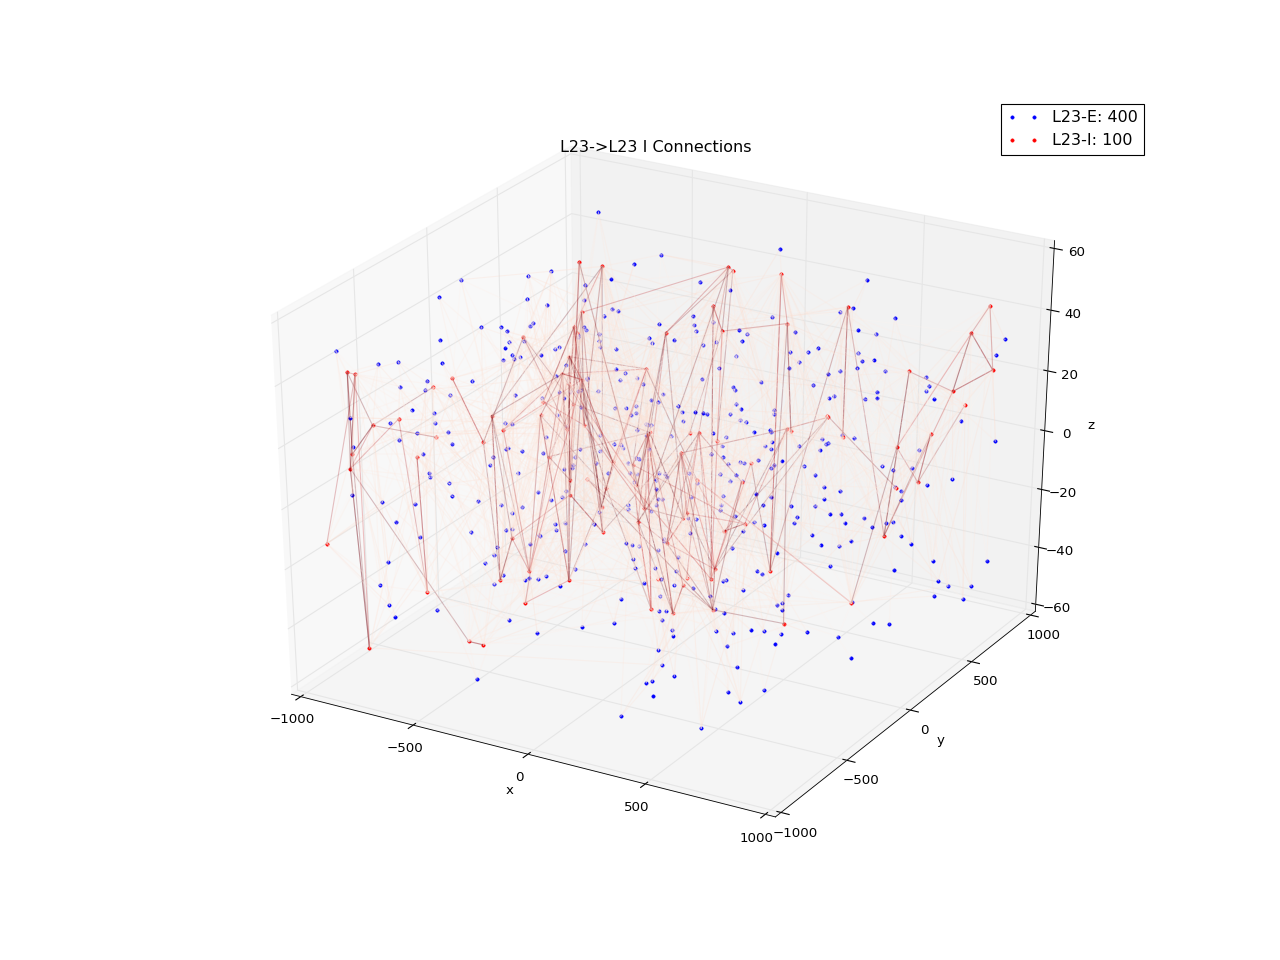

In [10]:
#plot L23->L23 I connections
w_min = min(conn_list.N_syn)
w_max = max(conn_list.N_syn)
c_map_b = plt.cm.Blues(range(w_max-w_min+1))
c_map_r = plt.cm.Reds(range(w_max-w_min+1))
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(np.array(nrn_list.x)[np.array(nrn_list.type)=='LIF_exc'], np.array(nrn_list.y)[np.array(nrn_list.type)=='LIF_exc'], np.array(nrn_list.z)[np.array(nrn_list.type)=='LIF_exc'], '.b', alpha=1., label='L23-E: %d'%(np.sum(np.array(nrn_list.type)=='LIF_exc')))
ax.plot(np.array(nrn_list.x)[np.array(nrn_list.type)=='LIF_inh'], np.array(nrn_list.y)[np.array(nrn_list.type)=='LIF_inh'], np.array(nrn_list.z)[np.array(nrn_list.type)=='LIF_inh'], '.r', alpha=1., label='L23-I: %d'%(np.sum(np.array(nrn_list.type)=='LIF_inh')))
for src in range(num_nrn):
    if src in idx_E:
        continue
    elif src in idx_I:
        src_cm = c_map_r
    else:
        assert False, 'ERROR: Unknown neuron type!'
    tgt_sel = conn_list[conn_list.src==src]['tgt'].values
    src_w = conn_list[conn_list.src==src]['N_syn'].values
    src_x = nrn_list[nrn_list.index==src].x.values[0]
    src_y = nrn_list[nrn_list.index==src].y.values[0]
    src_z = nrn_list[nrn_list.index==src].z.values[0]
    for n, tgt in enumerate(tgt_sel):
        ax.plot([src_x, nrn_list[nrn_list.index==tgt].x.values[0]], [src_y, nrn_list[nrn_list.index==tgt].y.values[0]], [src_z, nrn_list[nrn_list.index==tgt].z.values[0]], color=src_cm[src_w[n]-w_min], alpha=0.25)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('L23->L23 I Connections')
ax.legend()
fig.savefig('../build/' + neuron_file + '_IConn3D.png', dpi=600)